## Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")

## Reading the given dataset

In [3]:
data = pd.read_csv("training.csv")

In [4]:
data.head()

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
0,0,95.33,2893.0,10.68,21.33
1,0,94.41,2038.0,17.13,5.77
2,0,90.48,2183.0,6.61,15.39
3,0,93.04,2279.0,9.33,14.57
4,0,95.17,2384.0,6.99,17.62


## EDA

In [5]:
data.describe()

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
count,10000.000000,10000.000000,9994.000000,10000.000000,10000.000000
mean,0.271700,93.957429,2238.952471,9.549388,14.173489
std,0.444858,2.683740,196.041323,5.051887,4.607593
min,0.000000,59.760000,770.000000,-6.270000,-6.820000
25%,0.000000,92.540000,2107.000000,5.730000,11.360000
50%,0.000000,94.100000,2241.000000,9.430000,15.160000
75%,1.000000,95.660000,2367.000000,13.600000,17.630000
max,1.000000,102.040000,3061.000000,28.040000,24.860000


##  Feature Analysis

In [6]:
data.corr()[["InPlay"]].sort_values(["InPlay"])

,InPlay
InducedVertBreak,-0.093320
SpinRate,-0.065993
Velo,-0.052358
HorzBreak,0.072869
InPlay,1.000000


Class Split
0    7283
1    2717
Name: InPlay, dtype: int64


Text(0, 0.5, 'Count')

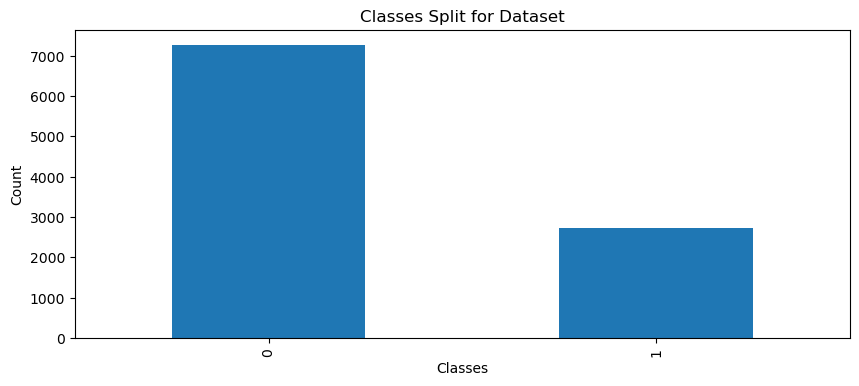

In [7]:
#Class Balance
print('Class Split')
print(data['InPlay'].value_counts())
data['InPlay'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

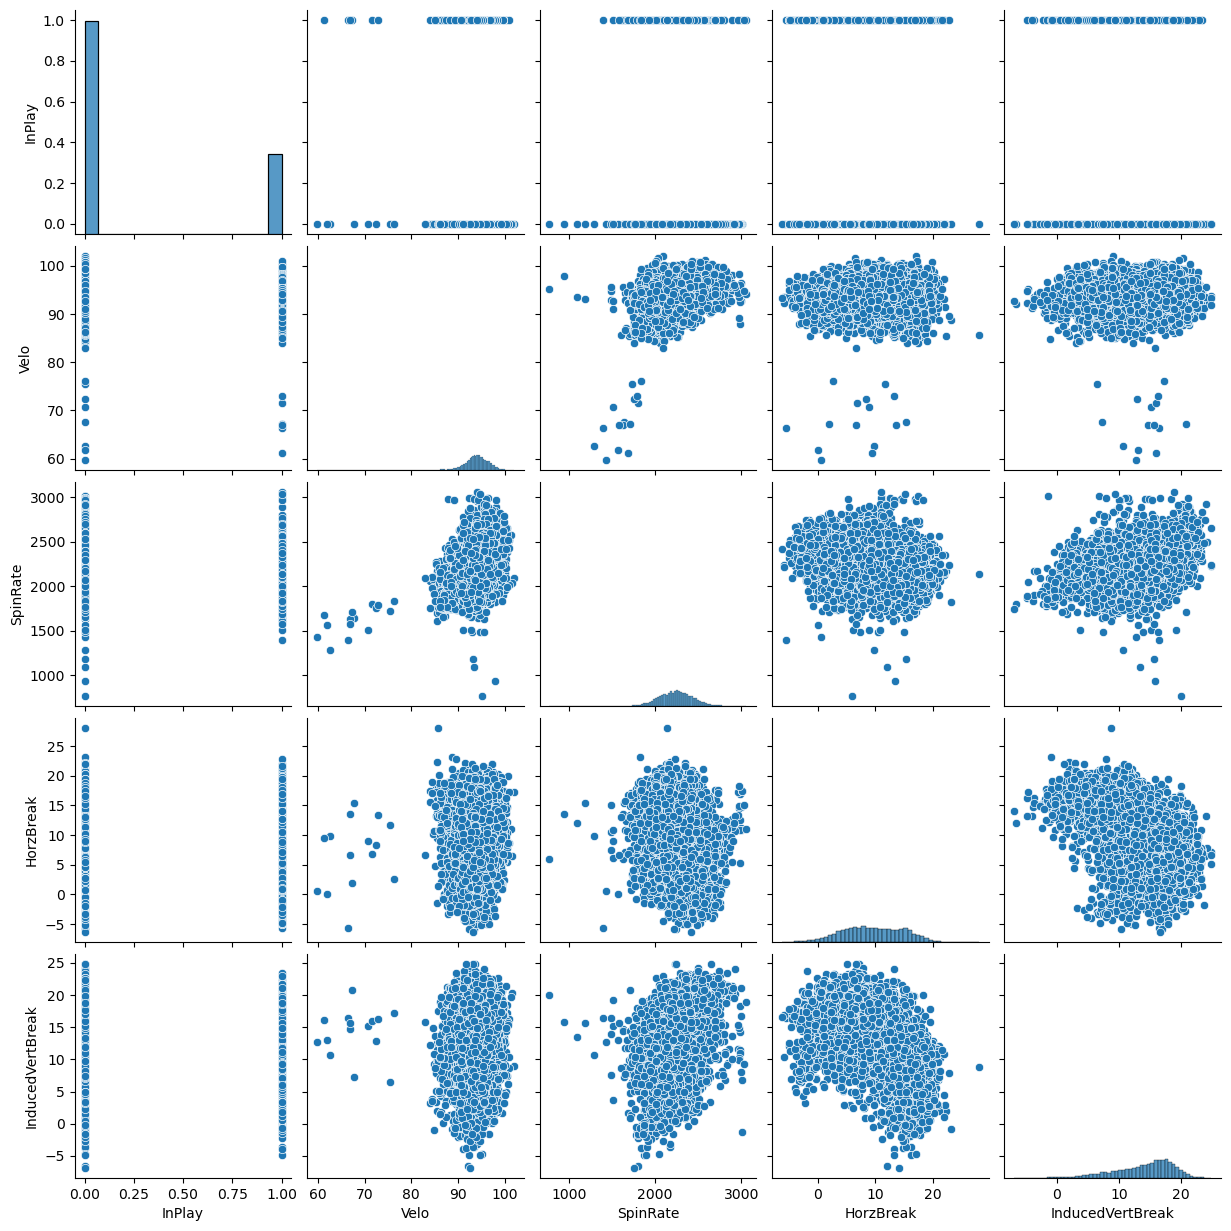

In [8]:
sb.pairplot(data)

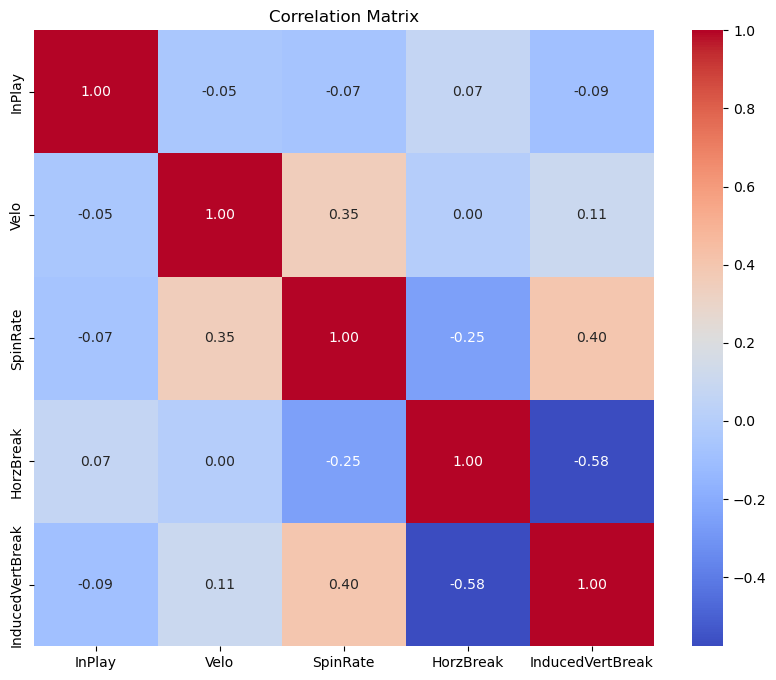

                    InPlay      Velo  SpinRate  HorzBreak  InducedVertBreak
InPlay            1.000000 -0.052358 -0.065993   0.072869         -0.093320
Velo             -0.052358  1.000000  0.350914   0.001000          0.105463
SpinRate         -0.065993  0.350914  1.000000  -0.253787          0.399194
HorzBreak         0.072869  0.001000 -0.253787   1.000000         -0.577016
InducedVertBreak -0.093320  0.105463  0.399194  -0.577016          1.000000


In [9]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

## Missing data check

In [10]:
data.isna().sum()

InPlay              0
Velo                0
SpinRate            6
HorzBreak           0
InducedVertBreak    0
dtype: int64

### Droping the rows with missing SpinRate

In [11]:
data = data.dropna(subset=['SpinRate'])

## Define X and Y

In [12]:
Y = data[["InPlay"]]
X = data.drop(["InPlay"],axis=1)

In [13]:
print(X.shape,'\n',Y.shape)

(9994, 4) 
 (9994, 1)


## Pre-Processing

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
Y_scaled = mms.fit_transform(Y.values.reshape(-1,1))

## Division of data in tarining and testing sets

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)

## Logestic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# Create and fit a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = model.predict(xtest)

# Calculate classification metrics
accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred)

print(f"Accuracy: {accuracy*100}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 73.42937174869948
Confusion Matrix:
 [[1835    0]
 [ 664    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1835
         1.0       0.00      0.00      0.00       664

    accuracy                           0.73      2499
   macro avg       0.37      0.50      0.42      2499
weighted avg       0.54      0.73      0.62      2499



In [20]:
from sklearn.naive_bayes import GaussianNB

# Create and fit a Gaussian Naive Bayes classifier
model2 = GaussianNB()
model2.fit(xtrain, ytrain)

# Make predictions on the test data
ypred2 = model.predict(xtest)

# Calculate classification metrics
accuracy = accuracy_score(ytest, ypred2)
conf_matrix = confusion_matrix(ytest, ypred2)
class_report = classification_report(ytest, ypred2)

print(f"Accuracy: {accuracy*100}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 73.42937174869948
Confusion Matrix:
 [[1835    0]
 [ 664    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1835
         1.0       0.00      0.00      0.00       664

    accuracy                           0.73      2499
   macro avg       0.37      0.50      0.42      2499
weighted avg       0.54      0.73      0.62      2499



In [21]:
from sklearn.tree import DecisionTreeClassifier
# Create and fit a Decision Tree classifier
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(xtrain, ytrain)

# Make predictions on the test data
ypred3 = model.predict(xtest)

# Calculate classification metrics
accuracy = accuracy_score(ytest, ypred3)
conf_matrix = confusion_matrix(ytest, ypred3)
class_report = classification_report(ytest, ypred3)

print(f"Accuracy: {accuracy*100}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 73.42937174869948
Confusion Matrix:
 [[1835    0]
 [ 664    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1835
         1.0       0.00      0.00      0.00       664

    accuracy                           0.73      2499
   macro avg       0.37      0.50      0.42      2499
weighted avg       0.54      0.73      0.62      2499



In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [24]:
# Build a neural network model
model4 = Sequential()
model4.add(Dense(units=64, activation='relu', input_dim=4))
model4.add(Dense(units=32, activation='relu'))
model4.add(Dense(units=1, activation='sigmoid'))

In [25]:
# Compile the model
model4.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model4.fit(xtrain, ytrain, epochs=100, batch_size=50, validation_data=(xtest, ytest))

# Make predictions on the test data
ypred_prob = model.predict(xtest)
ypred = (ypred_prob > 0.5).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(ytest, ypred)
class_report = classification_report(ytest, ypred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)

Epoch 1/100
150/150 [==============================] - 1s 3ms/step - loss: 0.5877 - accuracy: 0.7262 - val_loss: 0.5760 - val_accuracy: 0.7343
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7262 - val_loss: 0.5748 - val_accuracy: 0.7343
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7262 - val_loss: 0.5762 - val_accuracy: 0.7343
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7262 - val_loss: 0.5739 - val_accuracy: 0.7343
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7262 - val_loss: 0.5745 - val_accuracy: 0.7343
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7262 - val_loss: 0.5739 - val_accuracy: 0.7343
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7262 - val_loss: 0.5740 - val_accuracy: 0.7343

Epoch 58/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7264 - val_loss: 0.5745 - val_accuracy: 0.7343
Epoch 59/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7262 - val_loss: 0.5742 - val_accuracy: 0.7343
Epoch 60/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7264 - val_loss: 0.5745 - val_accuracy: 0.7343
Epoch 61/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7264 - val_loss: 0.5745 - val_accuracy: 0.7343
Epoch 62/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7265 - val_loss: 0.5742 - val_accuracy: 0.7343
Epoch 63/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7264 - val_loss: 0.5774 - val_accuracy: 0.7347
Epoch 64/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7264 - val_loss: 0.5744 - val_accuracy:

In [26]:
data["InPlay"].value_counts()

0    7278
1    2716
Name: InPlay, dtype: int64

In [38]:
# loading the deploy data and make predictions
deploy_data = pd.read_csv('deploy.csv')
deploy_data.isna().sum()

Velo                 0
SpinRate            13
HorzBreak            0
InducedVertBreak     0
dtype: int64

In [40]:
#dropping null Row's
deploy_data = deploy_data.dropna(subset=['SpinRate'])

#prediction
deploy_predictions = model.predict_proba(deploy_data[['Velo', 'SpinRate', 'HorzBreak', 'InducedVertBreak']])[:, 1]

# Createing a DataFrame with the predictions
deploy_results = pd.DataFrame({'Predicted_InPlay_Chance': deploy_predictions})

# Saveing the predictions to a CSV file
deploy_results.to_csv('deploy_predictions.csv', index=False)

# The data is biased for training the model, We would need it to be balanced so that we can assure the predictions are not biased and can be improved.

In [35]:
!pip freeze > requirements.txt